In [215]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score

import statsmodels.api as sm

import seaborn as sns



In [184]:
import os 
os.chdir("C:\WorkFile")

# Que.5

In [185]:
import pandas as pd

default = pd.read_excel('Default.xlsx',index_col=0)
print(df.shape)
df.head()

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(10000, 5)


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [186]:
default.shape

(10000, 4)

In [187]:
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [188]:
encoding_dict = {'Yes':1,'No':0}
default['default'] = default['default'].map(encoding_dict)
default.sample(10)

,default,student,balance,income
2584,0,No,412.687613,33923.458043
5159,0,No,211.983028,33448.244784
7045,0,Yes,997.936283,25788.363154
1991,0,No,0.000000,49792.757259
1295,0,No,1576.306916,30547.799971
7004,0,No,57.647049,38218.184473
5342,0,No,1024.326377,33832.489629
7473,0,Yes,1669.763112,23741.510598
5016,0,No,556.017498,33705.078650
5522,0,No,674.204630,46481.952680


(a) Fit a logistic regression model that uses income and balance to predict default.

In [189]:
LR = LogisticRegression()
LR.fit(default[['income','balance']],default['default'])
pred = LR.predict(default[['income','balance']])
print('train accuracy is',accuracy_score(pred,default['default']))

train accuracy is 0.9737


(b) Using the validation set approach, estimate the test error of this model

i) spliting the sample set into training set and validation set

In [190]:
X_train,X_valid,Y_train,Y_valid = train_test_split(default.drop(['default','student'],
                                        axis = 1) ,default['default'],test_size=0.3,                       
                                               random_state=0 )
print('shape of X_train',X_train.shape)
print('shape of X_valid',X_valid.shape)

shape of X_train (7000, 2)
shape of X_valid (3000, 2)


ii) Fit a multiple logistic regression model using only the trainig observation

In [191]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)


LogisticRegression()

iv) Compute the validation set error

In [192]:
pred = LR.predict(X_valid)
validation_err = 1 - accuracy_score(pred,Y_valid)
print('Validation error is ',round(validation_err,4))

Validation error is  0.0273


C) Repeat the process in (b) two times 

In [193]:
# when randiom_state = 5 

# spliting data into training set and validation set

X_train,X_valid,Y_train,Y_valid =train_test_split(default.drop(['default','student'],axis=1),
         
                                    default['default'],test_size=0.3,random_state=5)

print('shape of X_train',X_train.shape)
print('shape of X_valid',X_valid.shape)

LR = LogisticRegression()
LR.fit(X_train,Y_train)

pred = LR.predict(X_valid)
validation_err = 1 - accuracy_score(pred,Y_valid)
print('Validation error is ',round(validation_err,4))


shape of X_train (7000, 2)
shape of X_valid (3000, 2)
Validation error is  0.034


In [194]:
# when randiom_state = 10

# spliting data into training set and validation set

X_train,X_valid,Y_train,Y_valid =train_test_split(default.drop(['default','student'],axis=1),
         
                                    default['default'],test_size=0.3,random_state=10)

print('shape of X_train',X_train.shape)
print('shape of X_valid',X_valid.shape)

LR = LogisticRegression()
LR.fit(X_train,Y_train)

pred = LR.predict(X_valid)
validation_err = 1 - accuracy_score(pred,Y_valid)
print('Validation error is ',round(validation_err,4))


shape of X_train (7000, 2)
shape of X_valid (3000, 2)
Validation error is  0.0377


Comment : we can see that there no big diffrence , the result of validation error is 
#close to each other 

d) Now consider a logistic regression model that predicts
the probability of default using income, balance, and a dummy variable for student. 
Estimate the test error for this model using the validation set approach
and also comment on Results

In [195]:
default['student'] = default['student'].map(encoding_dict)

In [196]:
# splitting the data into train and test
# we only drop default for the train data
# NOTE - We are using random state = 1
X_train,X_valid,y_train,y_valid = train_test_split(default.drop(['default'],axis = 1),default['default'],test_size = 0.3,
                                                  random_state = 1)
print('Shape of X_train ',X_train.shape)
print('Shape of X_valid ',X_valid.shape)

# fit the logisitc regression on training data
lr = LogisticRegression()
lr.fit(X_train,y_train)

# obtain the predictions
pred = lr.predict(X_valid)

# computing the validation error
print('Validation error is ', 1 - accuracy_score(pred,y_valid))

Shape of X_train  (7000, 3)
Shape of X_valid  (3000, 3)
Validation error is  0.03200000000000003


 Comment :we can see above that while using balance and income for predicting default, validation error was 30.0333. When we added 
a new dummy variable student, the error remains the same ( random_state = 1)

# Que.6 

In [182]:
print(default.shape)
default.head()

(10000, 4)


,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


(a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors

In [204]:
X = default[['balance','income']]
X = sm.add_constant(X)
Y=default['default']

In [206]:
results = sm.Logit(Y,X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                  0.4594
Time:                        20:53:17   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

we can see that  std error for balance = 0, std error for incomes = 4.99e-06

(b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, 
and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [207]:
# to get random indices of given size 
#since the classes are imbalanced , we want to the random indices to contain
#both classes ,otherwise it will produces error , as model can't train if all observation belong
# to ine class 


def get_indices(data,num_samples) :
    positive_data = data[data['default'] == 1]
    negative_data = data[data['default'] == 0]
    
    positive_indices = np.random.choice(positive_data.index, int(num_samples / 4), replace=True)
    negative_indices = np.random.choice(negative_data.index, int(3*num_samples / 4), replace=True)
    total = np.concatenate([positive_indices,negative_indices])
    np.random.shuffle(total)
    return total



In [208]:
# similar to boot.fn in exercise

def boot_fn(data,index):
    X = data[['balance','income']].loc[index]
    y = data['default'].loc[index]
    
    lr = LogisticRegression()
    lr.fit(X,y)
    intercept = lr.intercept_
    coef_balance = lr.coef_[0][0]
    coef_income = lr.coef_[0][1]
    return [intercept,coef_balance,coef_income]

In [209]:
intercept,coef_balance,coef_income = boot_fn(default,get_indices(default,100))
print('Intercept is {}, the coeff of balance is {} , the coeff for income is {} '.format(intercept,coef_balance,coef_income))

Intercept is [-2.33221762e-07], the coeff of balance is 0.0018846388499059914 , the coeff for income is -8.619621346047968e-05 


(c) Use the boot() function together with your boot.fn() function 
to estimate the standard errors of the logistic regression coefficients for income and balance.

In [210]:
def boot(data,func,R):
    intercept = []
    coeff_balance = []
    coeff_income = []
    for i in range(R):
        
        [inter,balance,income] = func(data,get_indices(data,100))
        intercept.append(float(inter))
        coeff_balance.append(balance)
        coeff_income.append(income)
        
    intercept_statistics = {'estimated_value':np.mean(intercept),'std_error':np.std(intercept)}   
    balance_statistics = {'estimated_value':np.mean(coeff_balance),'std_error':np.std(coeff_balance)}
    income_statistics = {'estimated_value':np.mean(coeff_income),'std_error':np.std(coeff_income)}
    return {'intercept':intercept_statistics,'balance_statistices':balance_statistics,'income_statistics':income_statistics}

In [211]:
results = boot(default,boot_fn,1000)

In [212]:
print('Balance - ',results['balance_statistices'])
print('Income - ', results['income_statistics'])

Balance -  {'estimated_value': 0.003089322673748292, 'std_error': 0.00248553766841419}
Income -  {'estimated_value': -5.032607837086382e-05, 'std_error': 5.1612061474323556e-05}


 we can see that the standard errors obtained from model and from boostrap are similar

# Que.8

We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

In [214]:
np.random.seed(1)
y = np.random.normal(size = 100)
X = np.random.normal(size = 100)
y = X - 2*(X**2) + np.random.normal(size = 100) 

Comment : N is 100 and p is 2 (Number of features ,i.e X and X^2)

(b) Create a scatterplot of X against Y . Comment on what you find

C:\Users\Suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatterplot')

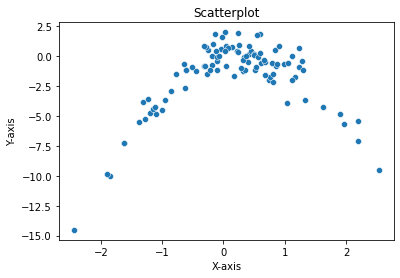

In [220]:
sns.scatterplot(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title('Scatterplot')